In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from sklearn.cluster import DBSCAN
from pca import *
from sklearn.neighbors import NearestNeighbors

In [2]:
df = load_data()

# TF-IDF RFM model Analysis

## 1. Evaluate the best number of Cluster on product by TF-IDF weight

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11348
Clusters = 8 ,Silhouette Score = 0.08078
Clusters = 9 ,Silhouette Score = 0.07797
Clusters = 10 ,Silhouette Score = 0.08938
Clusters = 11 ,Silhouette Score = 0.06361
Clusters = 12 ,Silhouette Score = 0.04589
Clusters = 13 ,Silhouette Score = 0.03957
Clusters = 14 ,Silhouette Score = 0.0869


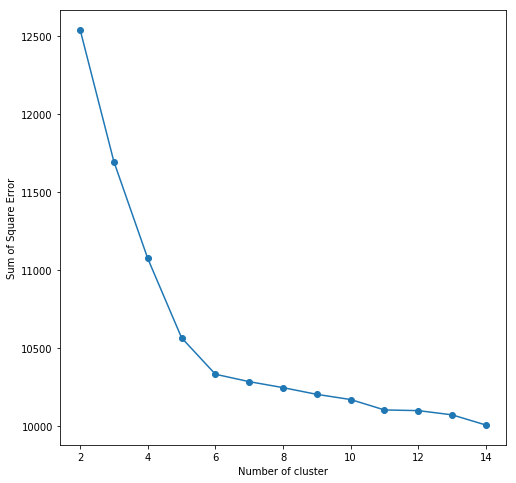

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6)

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

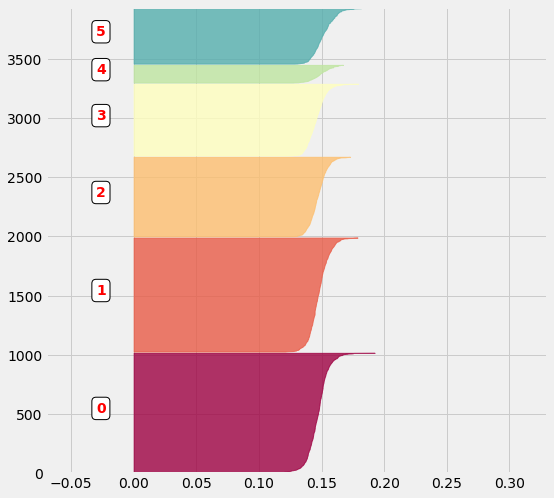

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

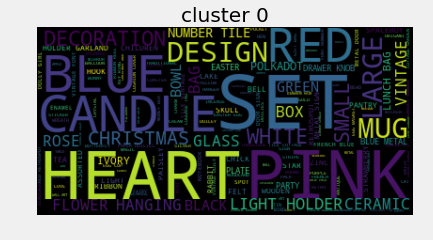

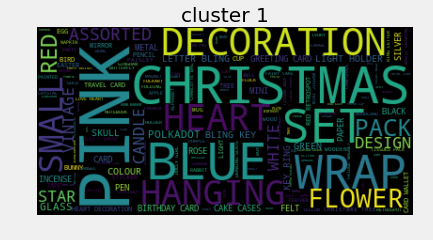

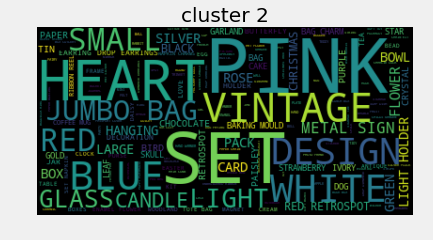

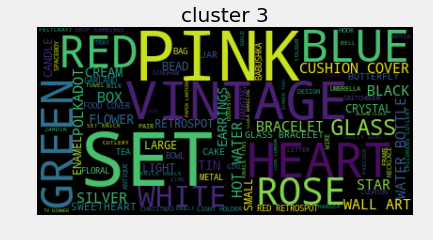

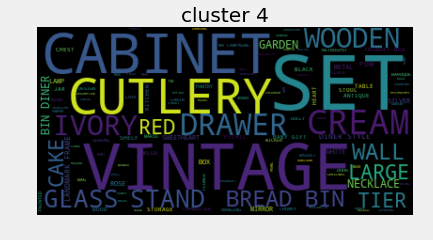

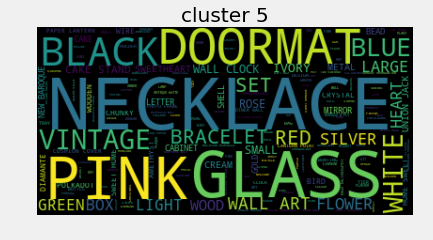

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

## 2. Categorical level RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.34976
Clusters = 3 ,Silhouette Score = 0.23696
Clusters = 4 ,Silhouette Score = 0.23206
Clusters = 5 ,Silhouette Score = 0.20141
Clusters = 6 ,Silhouette Score = 0.19398
Clusters = 7 ,Silhouette Score = 0.17704
Clusters = 8 ,Silhouette Score = 0.1791
Clusters = 9 ,Silhouette Score = 0.1754
Clusters = 10 ,Silhouette Score = 0.1669
Clusters = 11 ,Silhouette Score = 0.16312
Clusters = 12 ,Silhouette Score = 0.16014
Clusters = 13 ,Silhouette Score = 0.1527
Clusters = 14 ,Silhouette Score = 0.15155


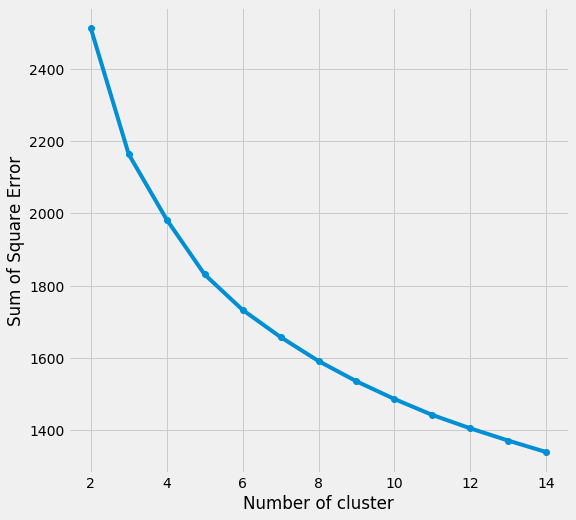

In [11]:
tf_idf_rfm = rfm(df,model_type='TF-IDF')
tf_idf_rfm_trans = rfm_transform(tf_idf_rfm)
matrix_trans = rfm_matrix(tf_idf_rfm_trans,model_type=1)
sse, sscore, test_range = kmeans(matrix_trans)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.6701270914223795
0.11834608884724379
0.0953564334122437
0.012245245560369102
0.08137404503051317
0.06969006314584857
0.03301198998276741
0.03792292436810127
0.043094625106674236
0.048095184268374766
[0.55416126 0.09786624]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


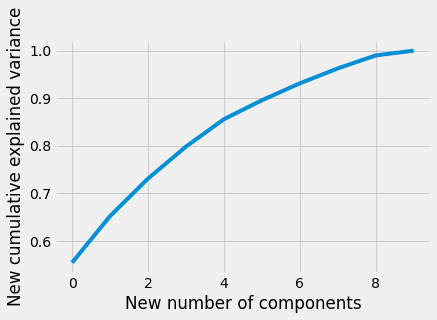

In [15]:
pca_test(tf_idf_rfm_trans)

In [17]:
clusters_trans = kmeans(matrix = matrix_trans, cluster_num = 4)
temp = tf_idf_rfm.copy()
temp = rfm_write_back(temp,clusters_trans)  
temp.groupby("Cluster", as_index = False)['CustomerID'].count()

,Cluster,CustomerID
0,0,1018
1,1,847
2,2,822
3,3,1635


## 3. Normalized continuous data RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.71417
Clusters = 3 ,Silhouette Score = 0.63272
Clusters = 4 ,Silhouette Score = 0.53676
Clusters = 5 ,Silhouette Score = 0.55159
Clusters = 6 ,Silhouette Score = 0.54195
Clusters = 7 ,Silhouette Score = 0.51412
Clusters = 8 ,Silhouette Score = 0.52413
Clusters = 9 ,Silhouette Score = 0.45636
Clusters = 10 ,Silhouette Score = 0.44302
Clusters = 11 ,Silhouette Score = 0.45407
Clusters = 12 ,Silhouette Score = 0.45448
Clusters = 13 ,Silhouette Score = 0.45511
Clusters = 14 ,Silhouette Score = 0.45672


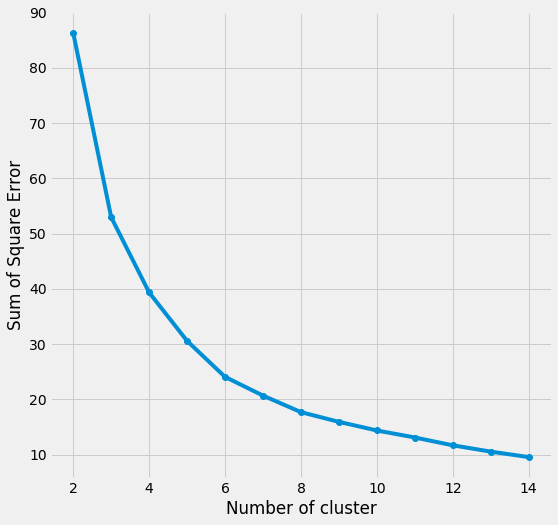

In [14]:
matrix_norm = rfm_matrix(tf_idf_rfm, model_type=1)
sse, sscore, test_range = kmeans(matrix_norm)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.07218275223465191
0.00409114570147314
0.000732848944932327
0.0006234742556479762
0.00024516578603897354
0.00014280997916507374
9.327790754722359e-05
2.9926576719411388e-05
9.794317597222507e-20
[0.9237453  0.05235567]


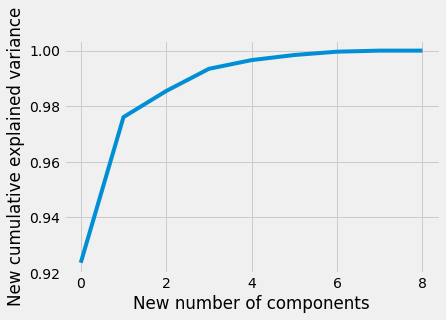

In [16]:
tf_idf_rfm_norm = norm(tf_idf_rfm.iloc[:,1:])
pca_test(tf_idf_rfm_norm)

In [19]:
clusters_norm = kmeans(matrix = matrix_norm, cluster_num = 5)
temp = tf_idf_rfm.copy()
temp = rfm_write_back(temp,clusters_norm)  
temp.groupby("Cluster", as_index = False)['CustomerID'].count()

,Cluster,CustomerID
0,0,498
1,1,1078
2,2,2111
3,3,617
4,4,18


## 4. Categorical level RFM with DBSCAN

In [126]:
X_trans = tf_idf_rfm_trans.iloc[:,1:]
X_trans = X_trans.drop(['Amount'], axis=1)

In [63]:
X_distance = X_trans.values
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

5.338744493952052

In [127]:
db = DBSCAN(eps= 1, min_samples=17).fit(X_trans)
labels_trans = db.labels_
n_clusters_trans = len(set(labels_trans)) - (1 if -1 in labels_trans else 0)
print(n_clusters_trans)
X_trans['DBcluster'] = labels_trans
X_trans.groupby("DBcluster", as_index = False).count()

4


,DBcluster,Frequency,Recency,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,-1,3512,3512,3512,3512,3512,3512,3512,3512
1,0,211,211,211,211,211,211,211,211
2,1,520,520,520,520,520,520,520,520
3,2,47,47,47,47,47,47,47,47
4,3,32,32,32,32,32,32,32,32


## 5. Normalized continuous data RFM with DBSCAN

In [124]:
X_norm = norm(tf_idf_rfm.iloc[:,1:])
X_norm = X_norm.drop(['Amount'], axis=1)

In [50]:
X_distance = X_norm.values
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

0.2930783088774555

In [125]:
db = DBSCAN(eps= 0.01, min_samples=20).fit(X_norm)
labels_norm = db.labels_
n_clusters_norm = len(set(labels_norm)) - (1 if -1 in labels_norm else 0)
print(n_clusters_norm)
X_norm['DBcluster'] = labels_norm
X_norm.groupby("DBcluster", as_index = False).count()

6


,DBcluster,Frequency,Recency,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,-1,1096,1096,1096,1096,1096,1096,1096,1096
1,0,108,108,108,108,108,108,108,108
2,1,2262,2262,2262,2262,2262,2262,2262,2262
3,2,421,421,421,421,421,421,421,421
4,3,388,388,388,388,388,388,388,388
5,4,29,29,29,29,29,29,29,29
6,5,18,18,18,18,18,18,18,18


## 6. Compute the score with results of the clusters above

In [60]:
from evaluation import *
result = get_score(matrix_trans,clusters_trans,'Categorical  TF-IDF RFM Kmeans++')
result = get_score(matrix_norm,clusters_norm,'Norm TF-IDF RFM Kmeans++',result,flag=1)
matrix_trans = X_trans.values
result = get_score(matrix_trans,labels_trans,'Categorical TF-IDF RFM DBSCAN',result,flag=1)
matrix_norm = X_norm.values
result = get_score(matrix_norm,labels_norm,'Norm TF-IDF RFM DBSCAN',result,flag=1)
print(result)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


NameError: name 'labels_norm' is not defined

In [15]:
n_attributes = len(tf_idf_rfm.columns) - 5
customer_clustering = df_for_chart(tf_idf_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,2595.0,1.0,1635,2,1.0,112.369942,1.783486,0.857902,125.317919,1.988991,...,0.918610,113.217726,1.796942,0.862606,142.890173,2.267890,1.036539,121.233141,1.924159,0.963745
2,3018.0,4.0,822,4,1.0,104.274354,3.828467,0.889800,103.048376,3.783455,...,1.014086,90.622929,3.327251,1.174014,49.701789,1.824818,0.916710,75.513585,2.772506,1.224476
1,2576.0,3.0,847,3,1.0,87.383540,2.657615,0.968640,80.784161,2.456907,...,1.007429,101.630435,3.090909,0.997044,127.872671,3.889020,0.934431,113.198758,3.442739,1.018699
0,4779.0,5.0,1018,5,1.0,97.384390,4.571709,0.624693,94.685081,4.444990,...,0.639655,97.865662,4.594303,0.629534,93.450513,4.387033,0.896133,96.819418,4.545187,0.688398


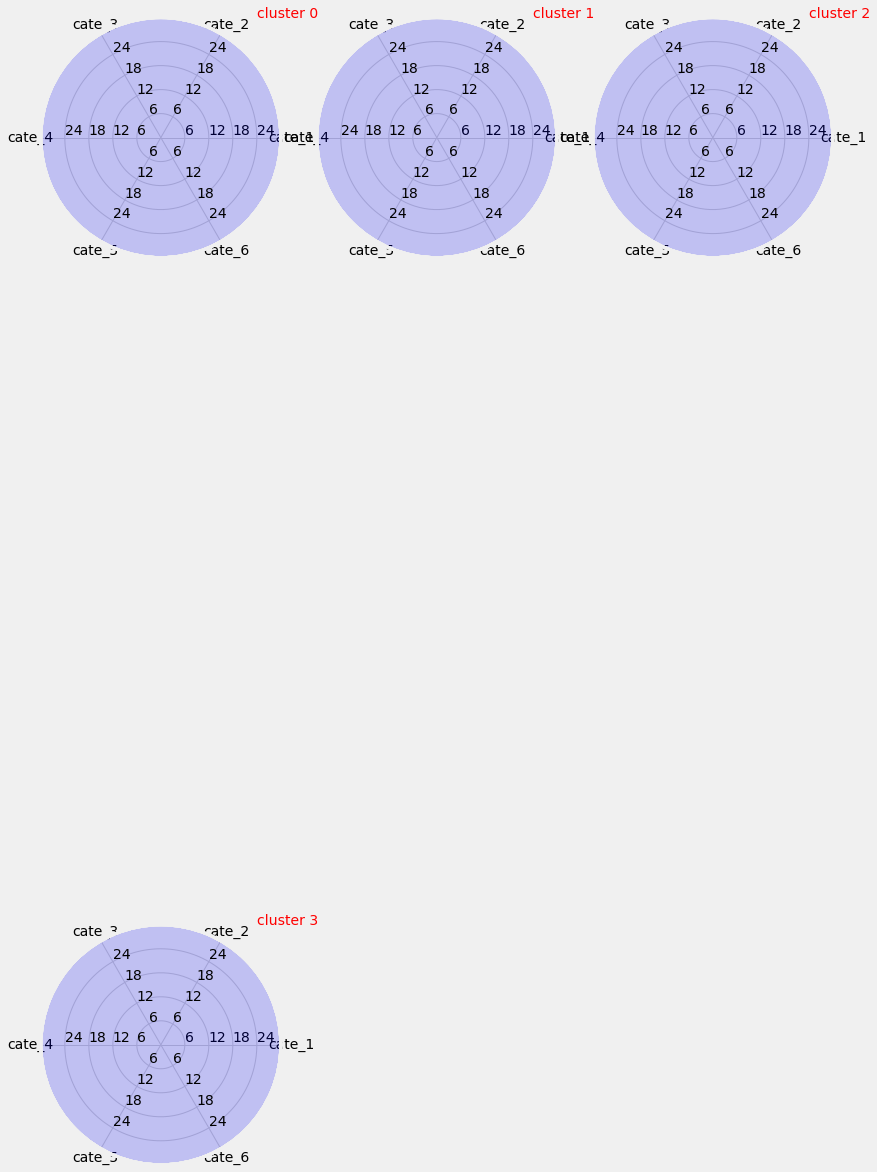

In [16]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

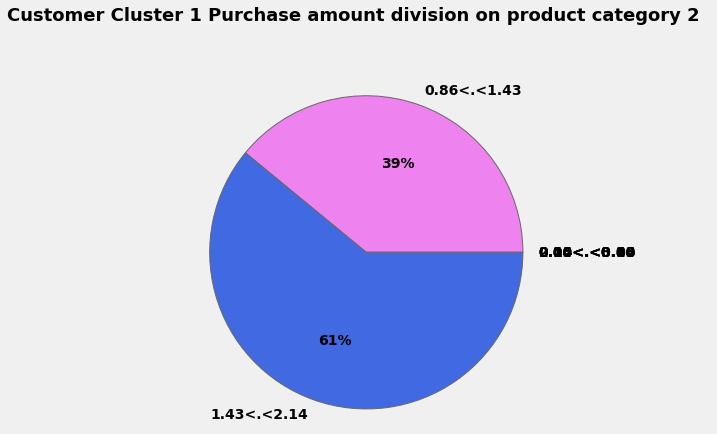

In [17]:
pie_chart(tf_idf_rfm, 1, 2)